In [140]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.special as sp


In [141]:
df = pd.read_excel("zem.xlsx")
df

,częstotliwość,Wartość skuteczna,przesunięcie fazowe,skała,stałe,Unnamed: 5,predkosc,E,sin,Nt,przesuniecie,napiecie z chwilonego,prąd,Nt.1,moduł,Energia nowa
0,5.0,119.500,-0.1,100,k,1.380000e-23,31.400,-0.0,0.001744,6.837603e-20,0.001744,168.49500,0.001685,5.275459e-08,0.001744,0.628790
1,6.0,116.000,-0.7,100,T,2.930000e+02,37.680,-0.0,-0.012211,-5.743447e-19,-0.012211,163.56000,0.001636,3.804150e-07,0.012211,0.624049
2,7.2,117.200,-4.4,100,N_c,1.000000e+00,45.216,-0.0,-0.076680,-4.328055e-18,-0.076756,165.25200,0.001653,2.364432e-06,0.076680,0.619309
3,8.6,109.100,-7.0,100,v,1.000000e+00,54.008,-0.0,-0.121808,-8.212035e-18,-0.122111,153.83100,0.001538,4.034798e-06,0.121808,0.614689
4,10.3,106.600,-9.2,100,sigma,1.000000e+00,64.684,-0.0,-0.159801,-1.290308e-17,-0.160489,150.30600,0.001503,5.417427e-06,0.159801,0.609999
5,12.4,103.700,-12.6,30,e,1.600000e-19,77.872,-0.0,-0.218034,-2.119453e-17,-0.219800,146.21700,0.001462,7.598320e-06,0.218034,0.605175
6,15.0,101.200,-15.4,30,u,1.000000e-03,94.200,-0.0,-0.265425,-3.121114e-17,-0.268644,142.69200,0.001427,9.478336e-06,0.265425,0.600226
7,18.0,98.600,-18.0,30,E,1.000000e+05,113.040,-0.0,-0.308866,-4.358318e-17,-0.314000,139.02600,0.001390,1.132045e-05,0.308866,0.595485
8,21.5,95.700,-20.5,30,A,2.000000e-02,135.020,-0.0,-0.350037,-5.899701e-17,-0.357611,134.93700,0.001349,1.321825e-05,0.350037,0.590866
9,25.7,92.500,-23.4,30,I,1.000000e+00,161.396,-0.0,-0.396958,-7.997505e-17,-0.408200,130.42500,0.001304,1.550865e-05,0.396958,0.586226


In [142]:
pikt = 0.015924
feuea = 3.2* pow(10, -6)
Nt = []

In [143]:
m = df['moduł'].values
p = df['prąd'].values
c = df['częstotliwość'].values
N = pikt * feuea * m / p
N

array([5.27560234e-08, 3.80425338e-07, 2.36449676e-06, 4.03490791e-06,
       5.41757417e-06, 7.59852638e-06, 9.47859428e-06, 1.13207591e-05,
       1.32186055e-05, 1.55090685e-05, 1.80871220e-05, 2.10506120e-05,
       2.44349435e-05, 2.82059689e-05, 3.30947277e-05, 3.72010571e-05,
       4.34241370e-05, 5.03750291e-05, 5.90619190e-05, 6.54698748e-05,
       7.55919824e-05, 9.06688175e-05, 9.65400186e-05, 1.12065767e-04,
       1.20336131e-04, 1.35921119e-04, 1.52342669e-04, 1.68601497e-04,
       2.15717729e-04, 2.35489273e-04, 3.04771995e-04, 2.84745776e-04,
       3.37370312e-04, 3.98390199e-04, 4.96956210e-04, 5.37193724e-04,
       6.24435050e-04, 7.50681592e-04, 7.95482681e-04, 9.44135941e-04,
       1.13644966e-03, 1.26454128e-03, 1.41422551e-03, 1.60736040e-03,
       1.78336244e-03, 2.02605306e-03, 2.27576371e-03])

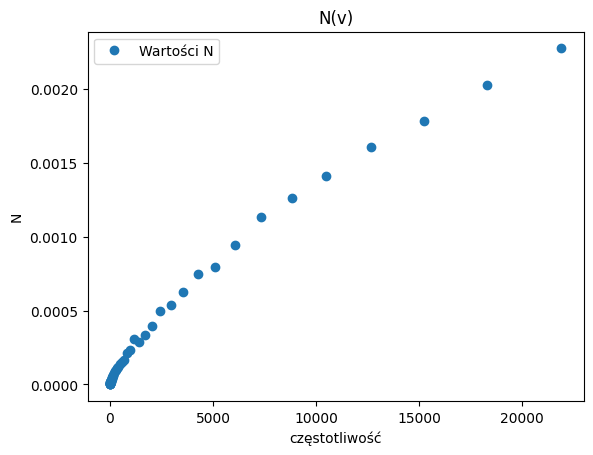

In [144]:
plt.plot(c, N, marker='o', linestyle='None', label='Wartości N')
plt.title('N(v)')
plt.xlabel('częstotliwość')
plt.ylabel('N')
plt.legend()
plt.show()

In [145]:
deg = 4
coeffs = np.polyfit(c, N, deg)
poly = np.poly1d(coeffs)
print(poly)

            4             3             2
-7.988e-21 x + 4.861e-16 x - 1.177e-11 x + 2.113e-07 x + 2.071e-05


In [146]:
x_fit = np.linspace(min(c), max(c), 100)
y_fit = poly(x_fit)

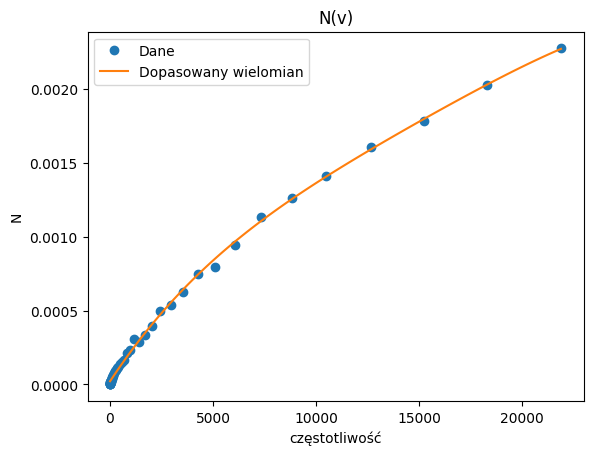

In [147]:
plt.plot(c, N, marker='o', linestyle='None', label='Dane')
plt.plot(x_fit, y_fit, label='Dopasowany wielomian')
#plt.text(0.05, max(N), f'Wzór: {poly}', fontsize=12)

plt.title('N(v)')
plt.xlabel('częstotliwość')
plt.ylabel('N')
plt.legend()
plt.show()

policzenie energii ze wzoru $E = kT\cdot ln(\frac{N_c\nuσ}{\omega})$

In [148]:
kT = 0.026
Nvos = pow(10,11)

In [149]:
w = 2*3,14*c
for item in w:
 r = Nvos / item

r


array([1.42857143e+09, 1.19047619e+09, 9.92063492e+08, 8.30564784e+08,
       6.93481276e+08, 5.76036866e+08, 4.76190476e+08, 3.96825397e+08,
       3.32225914e+08, 2.77932185e+08, 2.30414747e+08, 1.92529842e+08,
       1.60153748e+08, 1.33511348e+08, 1.10741971e+08, 9.27643785e+07,
       7.73036487e+07, 6.44080897e+07, 5.37056928e+07, 4.46987306e+07,
       3.72606006e+07, 3.10559006e+07, 2.58799172e+07, 2.15796288e+07,
       1.80375180e+07, 1.49745433e+07, 1.23578843e+07, 1.04427736e+07,
       8.68960723e+06, 7.25900116e+06, 6.01250601e+06, 5.02664120e+06,
       4.18445058e+06, 3.48432056e+06, 2.91545190e+06, 2.42130751e+06,
       2.01775626e+06, 1.67672703e+06, 1.39973685e+06, 1.17868930e+06,
       9.75800156e+05, 8.09847749e+05, 6.80272109e+05, 5.63761416e+05,
       4.68384075e+05, 3.90320062e+05, 3.26157860e+05])

In [150]:
E = kT*np.log(r)

In [151]:
deg = 4  # Stopień wielomianu do dopasowania
coeffs = np.polyfit(E, N, deg)
poly = np.poly1d(coeffs)
print(poly)

       4         3         2
3.464 x - 6.746 x + 4.925 x - 1.599 x + 0.1949


In [152]:
x_fitt = np.linspace(min(E), max(E), 100)
y_fitt = poly(x_fitt)

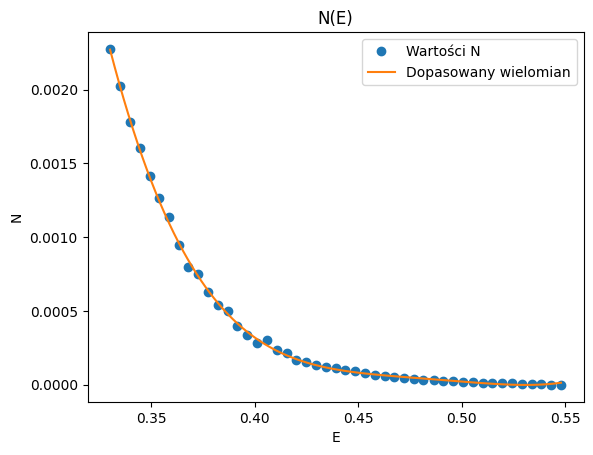

In [153]:
plt.plot(E, N, marker='o', linestyle='None', label='Wartości N')
plt.plot(x_fitt, y_fitt, label='Dopasowany wielomian')
plt.title('N(E)')
plt.xlabel('E')
plt.ylabel('N')
plt.legend()
plt.show()

In [154]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import scipy.special as sp

In [155]:
dane = pd.read_excel("ZEMM1.xlsx")
dane

,częstot,kąt,napięcie,prędkosc,stałe,Unnamed: 5,predkosc,zamiana na radiany,sin,napiecie sk,prąd
0,4.00,1.6,145.600,25.120000,k,1.380000e-23,25.1,0.027911,0.0279,203.8400,0.002038
1,4.80,4.9,144.500,30.144000,T,2.930000e+02,30.1,0.085478,0.0854,202.3000,0.002023
2,5.76,7.8,142.500,36.172800,N_c,1.000000e+00,36.2,0.136067,0.1360,199.5000,0.001995
3,6.91,11.2,139.800,43.407360,v,1.000000e+00,43.4,0.195378,0.1940,195.7200,0.001957
4,8.29,13.9,137.200,52.088832,sigma,1.000000e+00,52.1,0.242478,0.2400,192.0800,0.001921
5,9.95,16.5,134.200,62.506598,e,1.600000e-19,62.5,0.287833,0.2840,187.8800,0.001879
6,11.94,19.9,129.900,75.007918,u,1.000000e-03,75.0,0.347144,0.3400,181.8600,0.001819
7,14.33,22.5,126.000,90.009502,E,1.000000e+05,90.0,0.392500,0.3820,176.4000,0.001764
8,17.20,25.8,113.100,108.011402,A,2.000000e-02,108.0,0.450067,0.4350,158.3400,0.001583
9,20.64,29.0,108.000,129.613682,I,1.000000e+00,130.0,0.505889,0.4850,151.2000,0.001512


In [156]:
pikt = 0.015924
feuea = 3.2* pow(10, -6)
#Nt1 = []

In [157]:
r = dane['zamiana na radiany'].values
pr = dane['prąd'].values
cz = dane['częstot'].values
Nt = pikt * feuea * r / pr
Nt

array([6.97733958e-07, 2.15307664e-06, 3.47544959e-06, 5.08677006e-06,
       6.43267994e-06, 7.80661357e-06, 9.72691631e-06, 1.13381769e-05,
       1.44839947e-05, 1.70492586e-05, 1.99658208e-05, 2.32198366e-05,
       2.70916173e-05, 3.15222710e-05, 3.68699647e-05, 4.30259705e-05,
       5.11769499e-05, 6.11695585e-05, 7.41550613e-05, 8.90768835e-05,
       1.01260445e-04, 1.25056211e-04, 1.57363222e-04, 1.81147661e-04,
       2.17203412e-04, 2.79769514e-04, 3.12972225e-04, 4.03813016e-04,
       4.53409733e-04, 5.41266457e-04, 6.37764877e-04, 7.94555220e-04,
       8.22030976e-04, 9.77786563e-04, 1.06848144e-03, 1.28082301e-03,
       1.41555420e-03, 1.67876252e-03, 1.97669348e-03, 2.30670325e-03,
       2.24274567e-03, 2.49751043e-03, 2.88187835e-03, 3.24119349e-03,
       3.69710679e-03, 4.42811115e-03])

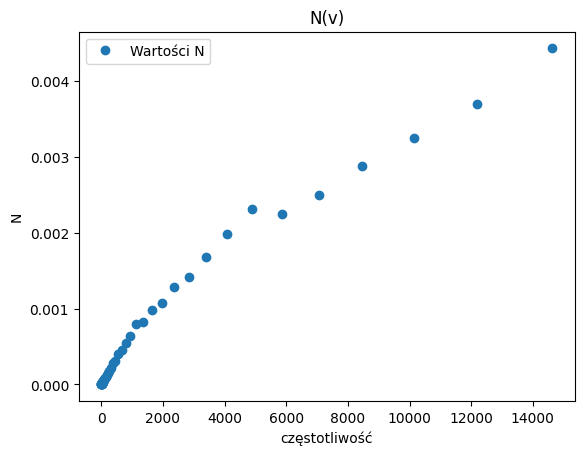

In [158]:
plt.plot(cz, Nt, marker='o', linestyle='None', label='Wartości N')
plt.title('N(v)')
plt.xlabel('częstotliwość')
plt.ylabel('N')
plt.legend()
plt.show()

In [159]:
degree = 4
coeffss = np.polyfit(cz, Nt, deg)
poly = np.poly1d(coeffs)
print(poly)

       4         3         2
3.464 x - 6.746 x + 4.925 x - 1.599 x + 0.1949


In [160]:
x_fittt = np.linspace(min(cz), max(cz), 100)
y_fittt = poly(x_fittt)

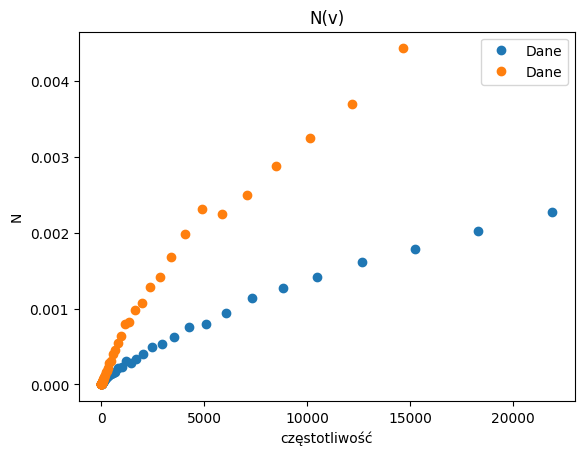

In [161]:
plt.plot(c, N, marker='o', linestyle='None', label='Dane')
plt.plot(cz, Nt, marker='o', linestyle='None', label='Dane')
#plt.text(0.05, max(N), f'Wzór: {poly}', fontsize=12)

plt.title('N(v)')
plt.xlabel('częstotliwość')
plt.ylabel('N')
plt.legend()
plt.show()

In [162]:
kT = 0.026
Nvos = pow(10,11)

In [163]:
wo = 2*3,14*cz
for item in wo:
 ri = Nvos / item

ri

array([1.78571429e+09, 1.48809524e+09, 1.24007937e+09, 1.03369857e+09,
       8.61623298e+08, 7.17875090e+08, 5.98229241e+08, 4.98454790e+08,
       4.15282392e+08, 3.46068660e+08, 2.88367265e+08, 2.40338396e+08,
       2.00304463e+08, 1.66889186e+08, 1.39074321e+08, 1.15899029e+08,
       9.65903603e+07, 8.04919669e+07, 6.70753793e+07, 5.58952746e+07,
       4.65787880e+07, 3.88156567e+07, 3.23469665e+07, 2.69551951e+07,
       2.24625213e+07, 1.87191602e+07, 1.55991639e+07, 1.29993032e+07,
       1.08326870e+07, 9.02730761e+06, 7.52267711e+06, 6.26890860e+06,
       5.22409814e+06, 4.35340981e+06, 3.62785993e+06, 3.02321405e+06,
       2.51933971e+06, 2.09945099e+06, 1.74954249e+06, 1.45795208e+06,
       1.21495965e+06, 1.01246753e+06, 8.43722938e+05, 7.03102171e+05,
       5.85918572e+05, 4.88265276e+05])

In [164]:
Et = kT*np.log(ri)

In [165]:
deg = 4  # Stopień wielomianu do dopasowania
coeffs = np.polyfit(Et, Nt, deg)
poly = np.poly1d(coeffs)
print(poly)

       4         3         2
5.141 x - 10.33 x + 7.805 x - 2.627 x + 0.3325


In [166]:
x_fitty = np.linspace(min(Et), max(Et), 100)
y_fitty = poly(x_fitty)

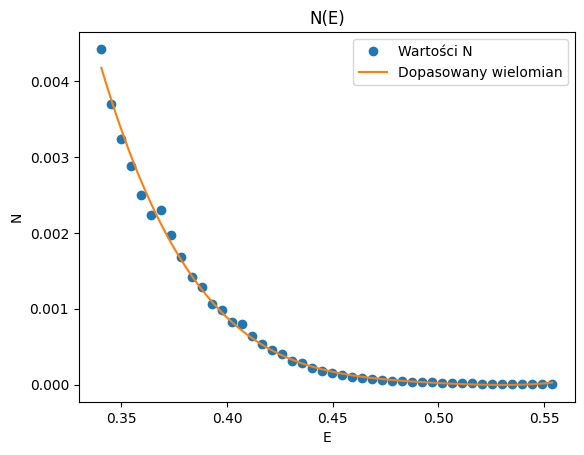

In [167]:
plt.plot(Et, Nt, marker='o', linestyle='None', label='Wartości N')
plt.plot(x_fitty, y_fitty, label='Dopasowany wielomian')
plt.title('N(E)')
plt.xlabel('E')
plt.ylabel('N')
plt.legend()
plt.show()

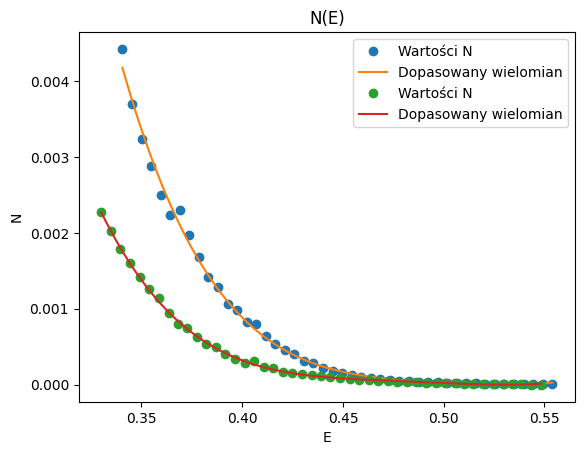

In [168]:
plt.plot(Et, Nt, marker='o', linestyle='None', label='Wartości N')
plt.plot(x_fitty, y_fitty, label='Dopasowany wielomian')
plt.plot(E, N, marker='o', linestyle='None', label='Wartości N')
plt.plot(x_fitt, y_fitt, label='Dopasowany wielomian')
plt.title('N(E)')
plt.xlabel('E')
plt.ylabel('N')
plt.legend()
plt.show()

In [174]:
temp_dict = {'częstotliwość': c ,'energia' : E ,'pułapki': N }
temp_df = pd.DataFrame(temp_dict)
temp_df.to_excel("result.0.xlsx", index = True)

In [175]:
temp_dict1 = {'częstotliwość': cz ,'energia' : Et ,'pułapki': Nt }
temp_dane = pd.DataFrame(temp_dict)
temp_dane.to_excel("result.1.xlsx", index = True)